<a href="https://colab.research.google.com/github/Addict07/MLPREDICTION/blob/main/ML_WeatherPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [6]:
from pandas import Series, DataFrame

In [7]:
df = pd.read_csv('/content/GHANA_1960-2022.csv', index_col = "DATE")

In [8]:
df

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
1973-01-03,GHM00065472,"KOTOKA INTERNATIONAL, GH",NaN,81,91.0,NaN
1973-01-04,GHM00065472,"KOTOKA INTERNATIONAL, GH",NaN,82,NaN,72.0
1973-01-05,GHM00065472,"KOTOKA INTERNATIONAL, GH",NaN,85,NaN,75.0
1973-01-07,GHM00065472,"KOTOKA INTERNATIONAL, GH",NaN,82,NaN,77.0
1973-01-19,GHM00065472,"KOTOKA INTERNATIONAL, GH",NaN,82,90.0,NaN
...,...,...,...,...,...,...
2022-10-11,GHM00065472,"KOTOKA INTERNATIONAL, GH",0.0,81,88.0,NaN
2022-10-12,GHM00065472,"KOTOKA INTERNATIONAL, GH",NaN,79,87.0,75.0
2022-10-13,GHM00065472,"KOTOKA INTERNATIONAL, GH",NaN,80,89.0,73.0


In [9]:
df.columns

Index(['STATION', 'NAME', 'PRCP', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

In [10]:
df.shape

(12276, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12276 entries, 1973-01-03 to 2022-10-15
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  12276 non-null  object 
 1   NAME     12276 non-null  object 
 2   PRCP     3581 non-null   float64
 3   TAVG     12276 non-null  int64  
 4   TMAX     5880 non-null   float64
 5   TMIN     6463 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 671.3+ KB


In [12]:
df.describe()

,PRCP,TAVG,TMAX,TMIN
count,3581.000000,12276.000000,5880.000000,6463.000000
mean,0.160050,81.254480,88.175680,75.494971
std,0.578182,2.960803,3.790201,2.723046
min,0.000000,66.000000,75.000000,52.000000
25%,0.000000,79.000000,85.000000,74.000000
50%,0.000000,81.000000,89.000000,75.000000
75%,0.040000,84.000000,91.000000,77.000000
max,12.990000,91.000000,104.000000,83.000000


In [13]:
df.apply(pd.isnull).sum()

STATION       0
NAME          0
PRCP       8695
TAVG          0
TMAX       6396
TMIN       5813
dtype: int64

In [14]:
df.apply(pd.isnull).sum()/df.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.708293
TAVG       0.000000
TMAX       0.521017
TMIN       0.473526
dtype: float64

In [15]:
df['PRCP'].value_counts()

0.00    2369
0.04     151
0.02     130
0.08     122
0.01      81
        ... 
3.46       1
2.60       1
4.49       1
1.65       1
3.27       1
Name: PRCP, Length: 91, dtype: int64

In [16]:
del df['STATION']

In [17]:
del df['NAME']

In [18]:
df[pd.isnull(df['PRCP'])]

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1973-01-03,NaN,81,91.0,NaN
1973-01-04,NaN,82,NaN,72.0
1973-01-05,NaN,85,NaN,75.0
1973-01-07,NaN,82,NaN,77.0
1973-01-19,NaN,82,90.0,NaN
...,...,...,...,...
2022-10-09,NaN,78,NaN,NaN
2022-10-12,NaN,79,87.0,75.0
2022-10-13,NaN,80,89.0,73.0


In [19]:
df.apply(pd.isnull).sum()/df.shape[0]

PRCP    0.708293
TAVG    0.000000
TMAX    0.521017
TMIN    0.473526
dtype: float64

In [20]:
df[pd.isnull(df['PRCP'])]

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1973-01-03,NaN,81,91.0,NaN
1973-01-04,NaN,82,NaN,72.0
1973-01-05,NaN,85,NaN,75.0
1973-01-07,NaN,82,NaN,77.0
1973-01-19,NaN,82,90.0,NaN
...,...,...,...,...
2022-10-09,NaN,78,NaN,NaN
2022-10-12,NaN,79,87.0,75.0
2022-10-13,NaN,80,89.0,73.0


In [21]:
df['PRCP'] = df['PRCP'].fillna(0)

In [22]:
df

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1973-01-03,0.0,81,91.0,NaN
1973-01-04,0.0,82,NaN,72.0
1973-01-05,0.0,85,NaN,75.0
1973-01-07,0.0,82,NaN,77.0
1973-01-19,0.0,82,90.0,NaN
...,...,...,...,...
2022-10-11,0.0,81,88.0,NaN
2022-10-12,0.0,79,87.0,75.0
2022-10-13,0.0,80,89.0,73.0


In [23]:
df.count()

PRCP    12276
TAVG    12276
TMAX     5880
TMIN     6463
dtype: int64

In [24]:
df[pd.isnull(df['TMAX'])]

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1973-01-04,0.0,82,NaN,72.0
1973-01-05,0.0,85,NaN,75.0
1973-01-07,0.0,82,NaN,77.0
1973-01-22,0.0,83,NaN,75.0
1973-01-23,0.0,84,NaN,NaN
...,...,...,...,...
2022-09-08,0.0,78,NaN,73.0
2022-09-10,0.0,76,NaN,74.0
2022-09-14,0.0,78,NaN,73.0


In [25]:
df[pd.isnull(df['TMAX'])]

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1973-01-04,0.0,82,NaN,72.0
1973-01-05,0.0,85,NaN,75.0
1973-01-07,0.0,82,NaN,77.0
1973-01-22,0.0,83,NaN,75.0
1973-01-23,0.0,84,NaN,NaN
...,...,...,...,...
2022-09-08,0.0,78,NaN,73.0
2022-09-10,0.0,76,NaN,74.0
2022-09-14,0.0,78,NaN,73.0


In [26]:
df[pd.isnull(df['TMIN'])]

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1973-01-03,0.00,81,91.0,NaN
1973-01-19,0.00,82,90.0,NaN
1973-01-23,0.00,84,NaN,NaN
1973-01-30,0.00,87,NaN,NaN
1973-02-03,0.00,84,NaN,NaN
...,...,...,...,...
2022-10-01,0.00,76,78.0,NaN
2022-10-06,0.00,80,88.0,NaN
2022-10-09,0.00,78,NaN,NaN


In [27]:
df = df.fillna(method = "ffill")

In [28]:
df

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1973-01-03,0.0,81,91.0,NaN
1973-01-04,0.0,82,91.0,72.0
1973-01-05,0.0,85,91.0,75.0
1973-01-07,0.0,82,91.0,77.0
1973-01-19,0.0,82,90.0,77.0
...,...,...,...,...
2022-10-11,0.0,81,88.0,77.0
2022-10-12,0.0,79,87.0,75.0
2022-10-13,0.0,80,89.0,73.0


In [29]:
df = df.iloc[1:].copy()

In [30]:
df

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1973-01-04,0.0,82,91.0,72.0
1973-01-05,0.0,85,91.0,75.0
1973-01-07,0.0,82,91.0,77.0
1973-01-19,0.0,82,90.0,77.0
1973-01-22,0.0,83,90.0,75.0
...,...,...,...,...
2022-10-11,0.0,81,88.0,77.0
2022-10-12,0.0,79,87.0,75.0
2022-10-13,0.0,80,89.0,73.0


In [31]:
df.index = pd.to_datetime(df.index)

In [32]:
df.apply(lambda x: (x==9999).sum())

PRCP    0
TAVG    0
TMAX    0
TMIN    0
dtype: int64

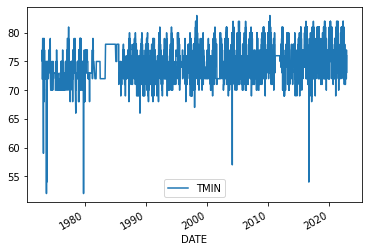

In [33]:
df[['TMIN']].plot()

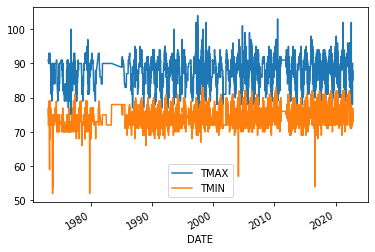

In [34]:
df[['TMAX','TMIN']].plot()

In [35]:
df.index.year.value_counts().sort_index()

1973    139
1974     76
1975     61
1976    102
1977    154
1978    123
1979    173
1980     79
1981     22
1982      6
1983      6
1984      2
1985     63
1986    206
1987    297
1988    285
1989    350
1990    350
1991    329
1992    272
1993    288
1994    286
1995    163
1996    182
1997    331
1998    332
1999    181
2000    244
2001    227
2002    237
2003    351
2004    340
2005    325
2006    276
2007    263
2008    258
2009    354
2010    358
2011    356
2012    314
2013    364
2014    359
2015    354
2016    344
2017    356
2018    364
2019    362
2020    365
2021    360
2022    286
Name: DATE, dtype: int64

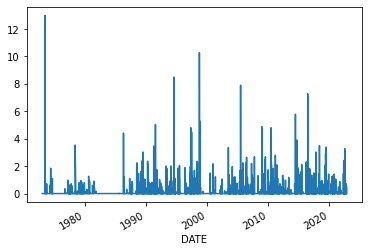

In [36]:
df['PRCP'].plot()

In [37]:
df.groupby(df.index.year).sum()['PRCP']

DATE
1973    15.03
1974     4.59
1975     0.00
1976     0.39
1977     4.52
1978     4.39
1979     8.30
1980     4.21
1981     1.91
1982     0.00
1983     0.00
1984     0.00
1985     0.02
1986     7.05
1987     4.89
1988    11.79
1989    24.52
1990    19.33
1991    37.02
1992     4.20
1993    10.72
1994    19.51
1995    13.04
1996     8.64
1997    34.32
1998    26.12
1999     0.16
2000     4.36
2001     1.49
2002     3.16
2003     8.37
2004    12.48
2005    23.28
2006    16.49
2007    11.35
2008     7.38
2009    17.78
2010    25.73
2011    14.48
2012     6.86
2013     2.90
2014    19.18
2015    14.36
2016    27.75
2017    15.30
2018    11.91
2019    22.26
2020    13.78
2021     6.07
2022    21.75
Name: PRCP, dtype: float64

TRAINING MY MACHINE LEARNING MODEL

In [38]:
df.columns

Index(['PRCP', 'TAVG', 'TMAX', 'TMIN'], dtype='object')

In [39]:
df["target"] = df.shift(-1)["TMAX"]

In [40]:
df

,PRCP,TAVG,TMAX,TMIN,target
DATE,,,,,
1973-01-04,0.0,82,91.0,72.0,91.0
1973-01-05,0.0,85,91.0,75.0,91.0
1973-01-07,0.0,82,91.0,77.0,90.0
1973-01-19,0.0,82,90.0,77.0,90.0
1973-01-22,0.0,83,90.0,75.0,90.0
...,...,...,...,...,...
2022-10-11,0.0,81,88.0,77.0,87.0
2022-10-12,0.0,79,87.0,75.0,89.0
2022-10-13,0.0,80,89.0,73.0,87.0


In [41]:
df = df.iloc[:-1,:].copy()

In [42]:
print(df)

            PRCP  TAVG  TMAX  TMIN  target
DATE                                      
1973-01-04  0.00    82  91.0  72.0    91.0
1973-01-05  0.00    85  91.0  75.0    91.0
1973-01-07  0.00    82  91.0  77.0    90.0
1973-01-19  0.00    82  90.0  77.0    90.0
1973-01-22  0.00    83  90.0  75.0    90.0
...          ...   ...   ...   ...     ...
2022-10-10  0.47    79  86.0  77.0    88.0
2022-10-11  0.00    81  88.0  77.0    87.0
2022-10-12  0.00    79  87.0  75.0    89.0
2022-10-13  0.00    80  89.0  73.0    87.0
2022-10-14  0.00    80  87.0  76.0    90.0

[12274 rows x 5 columns]


In [43]:
from sklearn.linear_model import Ridge

In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
df

,PRCP,TAVG,TMAX,TMIN,target
DATE,,,,,
1973-01-04,0.00,82,91.0,72.0,91.0
1973-01-05,0.00,85,91.0,75.0,91.0
1973-01-07,0.00,82,91.0,77.0,90.0
1973-01-19,0.00,82,90.0,77.0,90.0
1973-01-22,0.00,83,90.0,75.0,90.0
...,...,...,...,...,...
2022-10-10,0.47,79,86.0,77.0,88.0
2022-10-11,0.00,81,88.0,77.0,87.0
2022-10-12,0.00,79,87.0,75.0,89.0


In [46]:
x = df.iloc[:,:-1]

In [47]:
y = df.iloc[:,-1]

In [48]:
y

DATE
1973-01-04    91.0
1973-01-05    91.0
1973-01-07    90.0
1973-01-19    90.0
1973-01-22    90.0
              ... 
2022-10-10    88.0
2022-10-11    87.0
2022-10-12    89.0
2022-10-13    87.0
2022-10-14    90.0
Name: target, Length: 12274, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
x_train = scaler.fit_transform(x_train)

In [54]:
x_test = scaler.transform(x_test)

In [55]:
model = Ridge(alpha = .1)

In [56]:
model.fit(x_train,y_train)

Ridge(alpha=0.1)

In [57]:
prediction = model.predict(x_test)

In [58]:
from sklearn.metrics import max_error
print(f"Maximum Residual Error(MSE) = {max_error(y_test, prediction)}")

Maximum Residual Error(MSE) = 15.538012037412543


In [59]:
import pandas as pd
from pandas import DataFrame
import numpy as np


In [60]:
day1 = [0.37, 88, 90, 74]
day2 = [0.56, 89, 87, 72]
day3 = [0.45, 87, 90, 78]
day4 = [0.4, 84, 91, 79] 

In [61]:
usr_input = [day1, day2, day3, day4]
std_usr_input = scaler.transform(usr_input)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [62]:
core_df= DataFrame(usr_input, columns =['Precipitation', 'Average Temp', 'Maximum Temp', 'Minimum_Temp']) 

In [63]:
core_df

,Precipitation,Average Temp,Maximum Temp,Minimum_Temp
0,0.37,88,90,74
1,0.56,89,87,72
2,0.45,87,90,78
3,0.40,84,91,79


In [64]:
#Prediction is run only on the inputs that have been standardized
user_predict = model.predict(std_usr_input )

In [65]:
user_predict

array([90.65534165, 88.45702006, 90.74726276, 91.06713861])

In [66]:
core_df['Forecasted_Max_Temperatue'] = user_predict

In [67]:
core_df

,Precipitation,Average Temp,Maximum Temp,Minimum_Temp,Forecasted_Max_Temperatue
0,0.37,88,90,74,90.655342
1,0.56,89,87,72,88.457020
2,0.45,87,90,78,90.747263
3,0.40,84,91,79,91.067139
